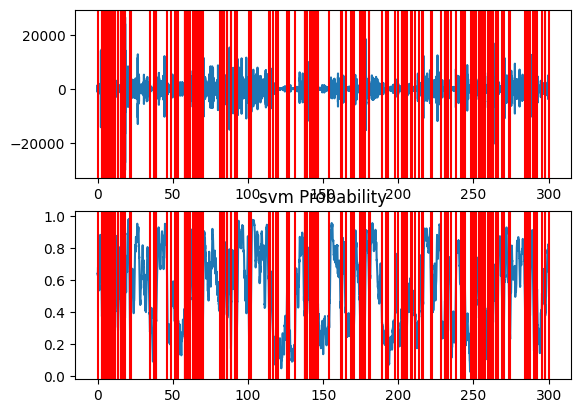

In [1]:
#import required libraries
import os
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
# path to audio file
# file ='../assets/202402181903_one_channel_120sec.wav'
file ='../assets/noise_canceled.wav'

assert os.path.isfile(file)

# below method returns the active / non silent segments of the audio file 
[Fs, x] = aIO.read_audio_file(file)
segments = aS.silence_removal(x, 
                             Fs, 
                             0.020, 
                             0.020, 
                             smooth_window=1.0, 
                             weight=0.3, 
                             plot=True)

## Remove too short windows

In [3]:
MIN_LENGTH, MIN_INTERVAL = 3, 3
START, END = 0, 1
modified_segments = [segment for segment in segments if segment[END] - segment[START] > MIN_LENGTH]
print(segments, len(segments))
print(modified_segments, len(modified_segments))

combined_segments = [modified_segments[0][:]]
index = 1
while index < len(modified_segments):
    if modified_segments[index][START]-combined_segments[-1][END] > MIN_INTERVAL:
        combined_segments.append(modified_segments[index])
    else:
        combined_segments[-1][END] = modified_segments[index][END]
    index += 1

print(combined_segments, len(combined_segments))

[[0.0, 2.84], [2.92, 3.38], [3.7, 4.0200000000000005], [4.4, 5.54], [6.1000000000000005, 7.5200000000000005], [8.700000000000001, 10.08], [11.48, 13.24], [13.74, 15.44], [15.8, 16.62], [18.240000000000002, 21.38], [22.16, 34.54], [37.62, 38.160000000000004], [38.300000000000004, 38.78], [39.02, 51.2], [48.86, 51.2], [52.78, 53.4], [57.9, 58.14], [58.44, 58.64], [59.120000000000005, 116.4], [61.480000000000004, 63.56], [64.22, 65.42], [65.9, 66.16], [66.24, 66.52], [67.16, 68.28], [68.74, 68.98], [70.10000000000001, 81.62], [82.84, 84.08], [84.18, 86.24], [86.36, 88.42], [88.94, 91.56], [92.84, 100.54], [101.92, 113.94], [114.94, 116.4], [118.94, 119.7], [125.8, 127.38000000000001], [131.5, 141.46], [137.70000000000002, 138.24], [139.24, 141.46], [141.64000000000001, 142.58], [143.06, 143.88], [145.0, 146.68], [154.22, 165.26], [162.34, 165.26], [168.48, 169.44], [170.70000000000002, 193.08], [175.72, 177.0], [177.86, 180.66], [180.84, 189.02], [191.92000000000002, 193.08], [197.78, 199

## Slice silent windows

In [4]:
from pydub import AudioSegment
myaudio = AudioSegment.from_wav(file)

In [8]:
if combined_segments:
    for index, segment in enumerate(combined_segments):
        extract = myaudio[segment[START]*1000:segment[END]*1000]
        extract.export(f'active-{index}.wav', format="wav")

## Create audio metadata

In [6]:
metadata = [{ 'start_sec': segment[0], 'end_sec': segment[1] } for segment in combined_segments]
print(metadata)

[{'start_sec': 18.240000000000002, 'end_sec': 34.54}, {'start_sec': 39.02, 'end_sec': 51.2}, {'start_sec': 59.120000000000005, 'end_sec': 81.62}, {'start_sec': 92.84, 'end_sec': 113.94}, {'start_sec': 131.5, 'end_sec': 141.46}, {'start_sec': 154.22, 'end_sec': 165.26}, {'start_sec': 170.70000000000002, 'end_sec': 189.02}, {'start_sec': 203.76, 'end_sec': 210.82}, {'start_sec': 214.02, 'end_sec': 228.52}, {'start_sec': 238.08, 'end_sec': 244.58}, {'start_sec': 251.42000000000002, 'end_sec': 284.32}]


In [7]:
import json
json_object = json.dumps(metadata, indent=4)
 
# Writing to sample.json
with open("audio_metadata.json", "w") as outfile:
    outfile.write(json_object)